# Я художник, я так вижу, визуализация данных в питоне

# I. Numpy

### Импортируйте NumPy

In [1]:
import numpy as np

### Создайте одномерный массив размера 10, заполненный нулями и пятым элемент равным 1. Трансформируйте в двумерный массив.

In [2]:
arr = np.zeros(10)
arr[4] = 1
# Трансформируем в 2D (например, 2 строки по 5 столбцов)
arr_2d = arr.reshape(2, 5)
print(arr_2d)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]]


### Создайте одномерный массив со значениями от 10 до 49 и разверните его (первый элемент становится последним). Найдите в нем все четные элементы.

In [3]:
arr = np.arange(10, 50)
# Разворачиваем
reversed_arr = arr[::-1]
# Находим четные
evens = reversed_arr[reversed_arr % 2 == 0]

print("Развернутый массив:", reversed_arr)
print("Четные элементы:", evens)

Развернутый массив: [49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26
 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10]
Четные элементы: [48 46 44 42 40 38 36 34 32 30 28 26 24 22 20 18 16 14 12 10]


### Создайте двумерный массив 3x3 со значениями от 0 до 8

In [4]:
matrix = np.arange(9).reshape(3, 3)
print(matrix)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


### Создайте массив 4x3x2 со случайными значениями. Найти его минимум и максимум.

In [5]:
rand_matrix = np.random.random((4, 3, 2))
print("Минимум:", rand_matrix.min())
print("Максимум:", rand_matrix.max())

Минимум: 0.006218679260573512
Максимум: 0.9591448480887425


### Создайте два двумерных массива размерами 6x4 и 4x3 и произведите их матричное умножение. 

In [6]:
A = np.random.randint(1, 10, (6, 4))
B = np.random.randint(1, 10, (4, 3))

# Матричное умножение выполняется оператором @ или функцией np.dot()
C = A @ B

print(f"Размер результата: {C.shape}")
print(C)

Размер результата: (6, 3)
[[63 58 42]
 [34 56 39]
 [59 60 46]
 [72 70 47]
 [43 78 60]
 [69 52 49]]


### Создайте случайный двумерный массив 7x7, найти у него среднее и стандартное оклонение. Нормализуйте этот массив.

In [7]:
arr = np.random.random((7, 7))
mean = arr.mean()
std = arr.std()

# Формула нормализации: (x - среднее) / отклонение
normalized = (arr - mean) / std

print(f"Среднее: {mean:.4f}, Отклонение: {std:.4f}")
print("Нормализованный массив (фрагмент):")
print(normalized[:2, :2]) # выведем кусочек 2x2

Среднее: 0.4693, Отклонение: 0.3239
Нормализованный массив (фрагмент):
[[-0.28400209 -1.38270193]
 [-1.34115477 -1.12693609]]


# II. Pandas

### Импортируйте: pandas, matplotlib, seaborn

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Загрузите датасет Tips из набора датасетов seaborn

In [9]:
tips = sns.load_dataset("tips")

### Посмотрите на первые 5 строчек

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Узнайте сколько всего строчек и колонок в данных

In [11]:
# shape возвращает кортеж (строки, колонки)
tips.shape

(244, 7)

### Проверьте есть ли пропуски в данных

In [12]:
# isnull() находит пустые ячейки, а sum() считает их количество по колонкам
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Посмотрите на распределение числовых признаков

In [13]:
# Метод describe() выводит основные стат. показатели: среднее, минимум, максимум, квантили
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Найдите максимальное значение 'total_bill'

In [14]:
tips['total_bill'].max()

np.float64(50.81)

### Найдите количество курящих людей

In [15]:
# value_counts() подсчитает количество "Yes" и "No"
tips['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

### Узнайте какой средний 'total_bill' в зависимости от 'day'

In [17]:
# Группируем по дням недели и считаем среднее для чека
tips.groupby('day', observed=False)['total_bill'].mean()

day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

### Отберите строчки с 'total_bill' больше медианы и узнайте какой средний 'tip' в зависимости от 'sex'

In [18]:
median_bill = tips['total_bill'].median()
# Фильтруем таблицу и считаем средние чаевые
tips[tips['total_bill'] > median_bill].groupby('sex')['tip'].mean()

/var/folders/r7/dy1v7l152mq34b_6jlw33b780000gn/T/ipykernel_7573/2717431465.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips[tips['total_bill'] > median_bill].groupby('sex')['tip'].mean()


sex
Male      3.756404
Female    3.663939
Name: tip, dtype: float64

### Преобразуйте признак 'smoker' в бинарный (0-No, 1-Yes)

In [19]:
# Метод map заменяет текстовые значения на числа
tips['smoker'] = tips['smoker'].map({'No': 0, 'Yes': 1})
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4


# III. Visualization

### Постройте гистограмму распределения признака 'total_bill'

Text(0.5, 1.0, 'Распределение суммы счета')

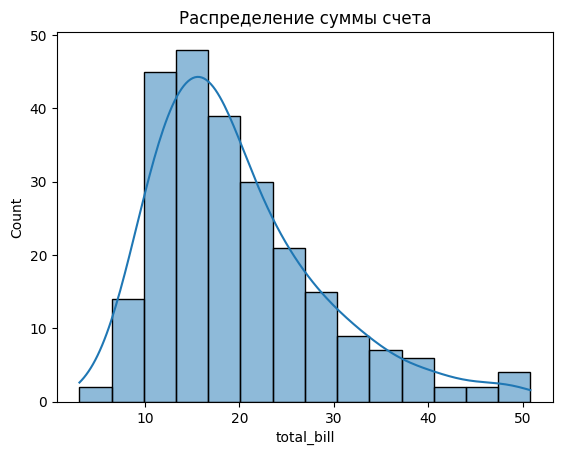

In [20]:
# Гистограмма показывает, какие суммы чеков встречаются чаще всего
sns.histplot(tips['total_bill'], kde=True) # kde добавит плавную линию распределения
plt.title('Распределение суммы счета')

### Постройте scatterplot, представляющий взаимосвязь между признаками 'total_bill' и 'tip'

Text(0.5, 1.0, 'Связь чека и чаевых')

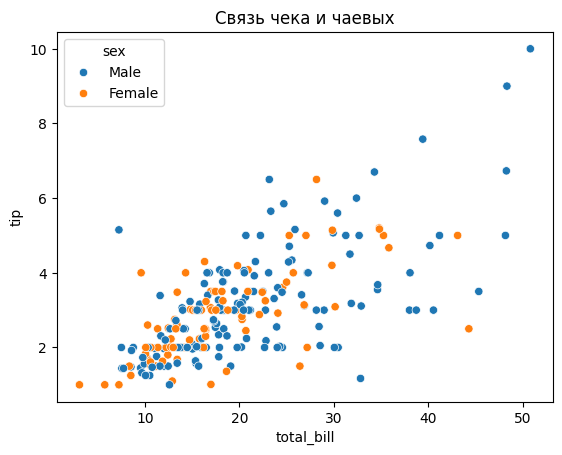

In [22]:
# Диаграмма рассеяния покажет, растут ли чаевые вместе с суммой чека
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex') # hue раскрасит точки по полу
plt.title('Связь чека и чаевых')

### Постройте pairplot

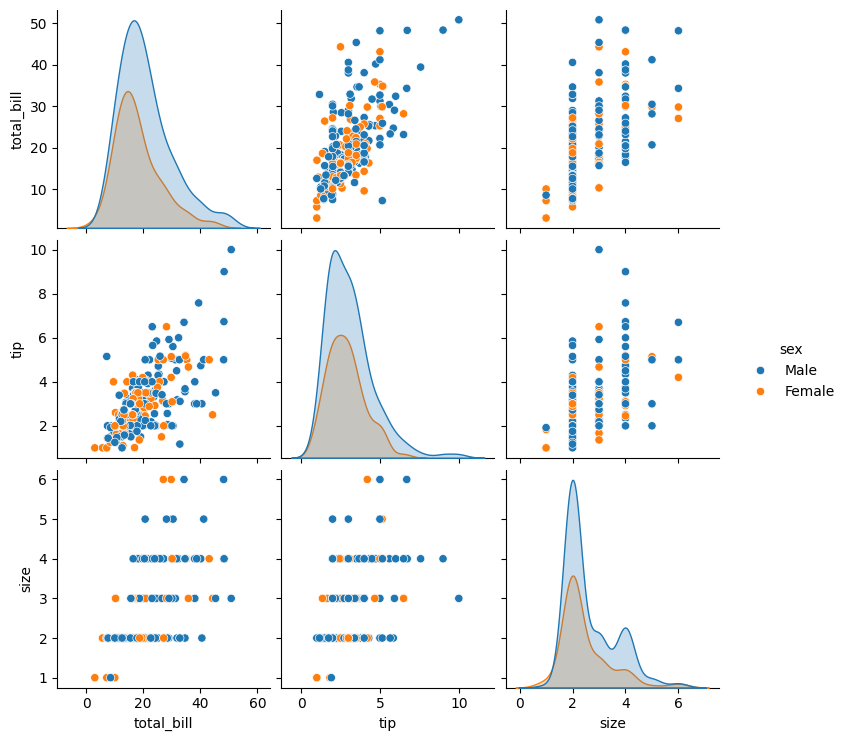

In [23]:
# hue='sex' раскрасит точки по полу, чтобы увидеть различия в поведении
sns.pairplot(tips, hue='sex', diag_kind='kde')
plt.show()

### Постройте график взаимосвязи между признаками 'total_bill' и 'day'

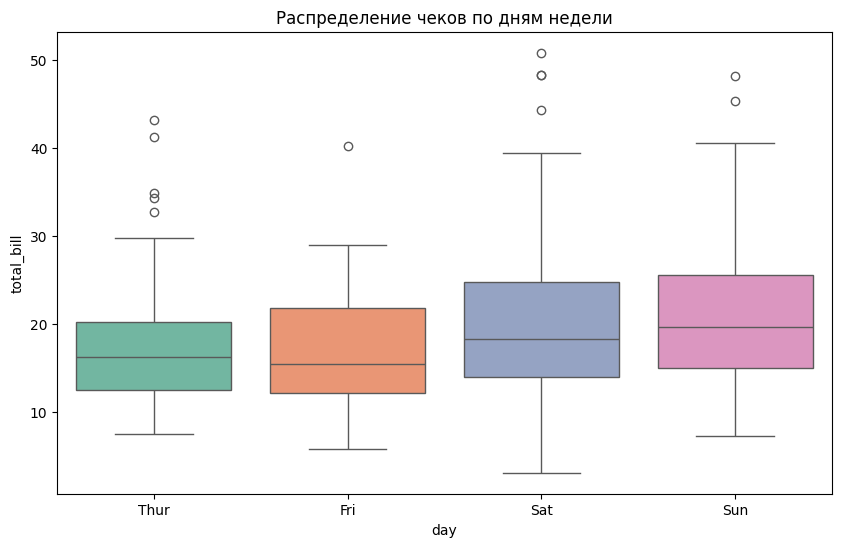

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=tips, x='day', y='total_bill', palette='Set2', hue='day', legend=False)
plt.title('Распределение чеков по дням недели')
plt.show()

### Постройте две гистограммы распределения признака 'tip' в зависимости от категорий 'time'

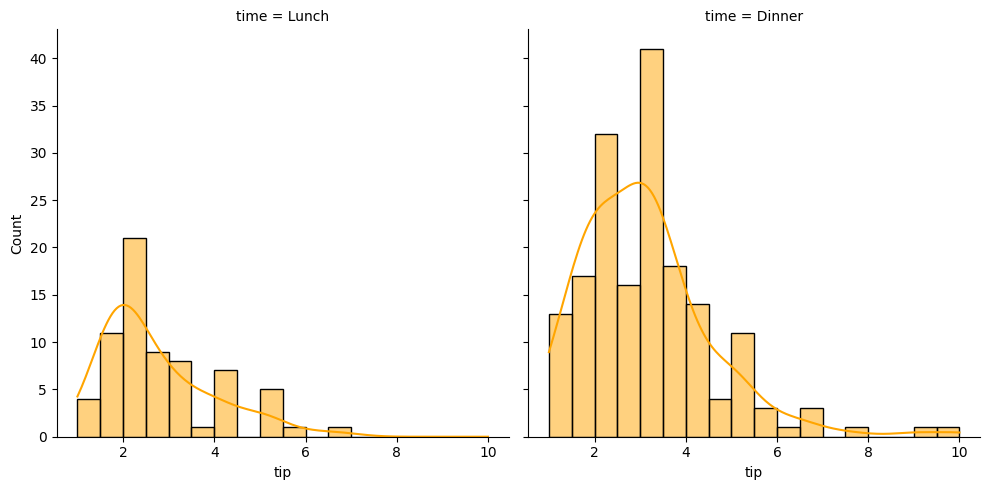

In [25]:
sns.displot(data=tips, x='tip', col='time', kde=True, color='orange')
plt.show()

### Постройте два графика scatterplot, представляющих взаимосвязь между признаками 'total_bill' и 'tip' один для Male, другой для Female и раскрасьте точки в зависимоти от признака 'smoker'

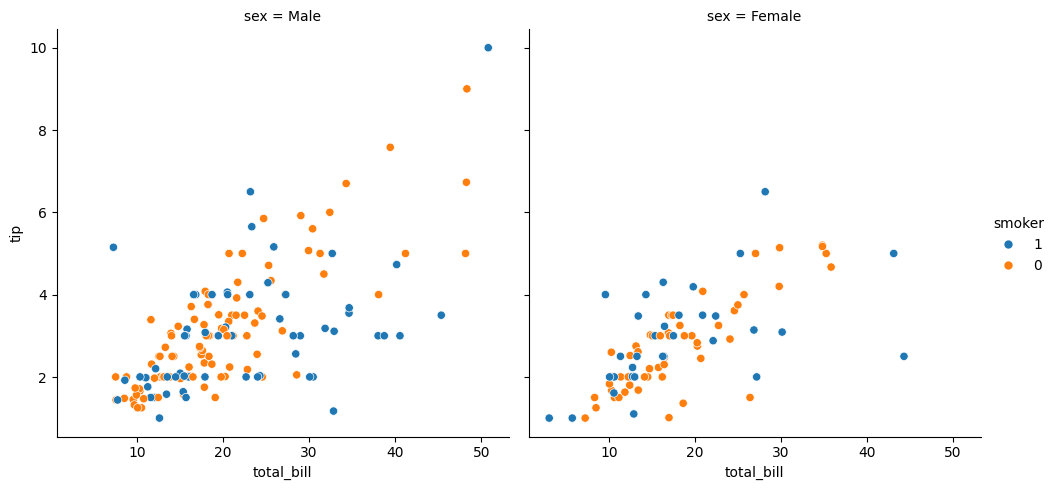

In [26]:
sns.relplot(data=tips, x='total_bill', y='tip', col='sex', hue='smoker', kind='scatter')
plt.show()

## Сделайте выводы по анализу датасета и построенным графикам. По желанию можете продолжить анализ данных и также отразить это в выводах.

На основе проведенного анализа можно сделать следующие выводы:

Корреляция: Существует прямая положительная связь между суммой счета (total_bill) и размером чаевых (tip). Чем выше счет, тем больше чаевые.

Дни недели: В выходные дни (суббота и воскресенье) средний чек выше, чем в будни (четверг и пятница).

Время суток: Ужины (Dinner) приносят больше дохода и чаевых, чем обеды (Lunch). 

Курение: Курящие и некурящие гости ведут себя примерно одинаково, однако среди курящих мужчин наблюдается чуть больший разброс в размере чаевых при низких чеках.

Пол: Мужчины и женщины оставляют чаевые примерно в одинаковой пропорции от счета, но максимальные чеки и чаевые в данном датасете чаще встречаются у мужчин.